# 2.1 - Regresion-Clasificacion

### Regresión  (se busca un nº)

### Regresión lineal

Se han de tener algunas suposiciones previas:

+ Exogeneidad débil (predictores libres de error)
+ Linealidad
+ Homocedasticidad (Var=cte) y Esperanza nula (**E**=0), la esperanza es la media
+ Independencia de los errores
+ Falta de colinealidad (independencia lineal)

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n+\epsilon$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente:

$$\vec{\beta} = (X^{T}X)^{-1}X^{T}y$$

+ Minimos cuadrados

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y-\hat{y})^{2}$$

Ejemplo)

$y = \beta_0 + \beta_1x_1 + \epsilon$

Entonces, derivando MSE e igualando a 0:

$\beta_0 = \frac{\sum y - \beta_1\sum x}{n} = \bar{y} - \beta_1\bar{x}$

$\beta_1=\frac{\sum (x-\hat{x})(y-\hat{y})}{\sum (x-\hat{x})}$



In [1]:
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

import numpy as np
import pandas as pd

from sklearn.datasets import make_circles, load_boston

from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [2]:
boston=load_boston()

#boston

In [3]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)

df['price']=boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X=df.drop('price', axis=1)
y=df.price

# corte vertical del dataframe


#X=boston.data

#y=boston.target

In [5]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2, random_state=42)  # corte horizontal del dataset

In [6]:
y_train.shape, y_test.shape

((404,), (102,))

In [7]:
linreg=LinReg()

linreg.fit(X_train, y_train)  # ajuste

LinearRegression()

In [8]:
train_score=linreg.score(X_train, y_train)
test_score=linreg.score(X_test, y_test)


train_score, test_score

(0.7508856358979672, 0.6687594935356311)

In [9]:
linreg.coef_[:10]

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02])

In [10]:
linreg.intercept_  # beta cero

30.246750993924124

In [11]:
linreg.fit(X, y)

LinearRegression()

##### Regularización

**Función de Coste o de Pérdida (J)** = Función a minimizar

En el caso de la regresión lineal: 
$$J=MSE$$


La regularización es una medida/penalización de la complejidad del modelo. Se añade un término a J que depende del tipo de regularización:

$$J = MSE + \alpha · T$$


+ Lasso (L1, norma 1):

$$T=\frac{1}{n}\sum_{i}  |\beta_i|$$

Muy útil si se sospecha que hay características irrelevantes. Se favorece $\beta \approx 0$

+ Ridge (L2):

$$T=\frac{1}{2n}\sum_{i}  \beta_{i}^{2}$$

Muy útil si se sospecha que existe correlación entre las características, minimiza esa correlación. Funciona mejor si todas son relevantes.

+ ElasticNet (L1+L2):

$$T=r·L1 + (1-r)·L2$$

Se usa cuando hay muchas características.

In [12]:
# Lasso L1

lasso=Lasso()
lasso.fit(X_train, y_train)

train_score=lasso.score(X_train, y_train)  # R2 score
test_score=lasso.score(X_test, y_test)


train_score, test_score 

(0.6959153721670908, 0.6671453631686304)

In [13]:
lasso.coef_

array([-0.07660927,  0.02850064, -0.        ,  0.        , -0.        ,
        1.63048892,  0.01639478, -0.63085765,  0.21965363, -0.01228558,
       -0.70858233,  0.0111811 , -0.74710661])

In [14]:
# Ridge L2

ridge=Ridge()
ridge.fit(X_train, y_train)

train_score=ridge.score(X_train, y_train)  # R2 score
test_score=ridge.score(X_test, y_test)


train_score, test_score # overfitting

(0.7487825119234439, 0.6662221670168519)

In [15]:
ridge.coef_

array([-1.09234061e-01,  3.22706863e-02,  7.49805942e-03,  2.54546998e+00,
       -9.53795159e+00,  4.46450537e+00, -1.21910176e-02, -1.33870040e+00,
        2.48881816e-01, -1.14746211e-02, -8.28604284e-01,  1.26421124e-02,
       -5.23833016e-01])

In [16]:
# ElasticNet L1+L2

elastic=ElasticNet()
elastic.fit(X_train, y_train)

train_score=elastic.score(X_train, y_train)  # R2 score
test_score=elastic.score(X_test, y_test)


train_score, test_score  

(0.6908083499815865, 0.6731556429073877)

In [17]:
elastic.coef_

array([-0.09329918,  0.03557051, -0.02012984,  0.        , -0.        ,
        1.16299643,  0.01859135, -0.7554234 ,  0.27598038, -0.01427315,
       -0.7527046 ,  0.01101275, -0.77557569])

### Máquinas de Soporte Vectorial

###### Linealmente separable

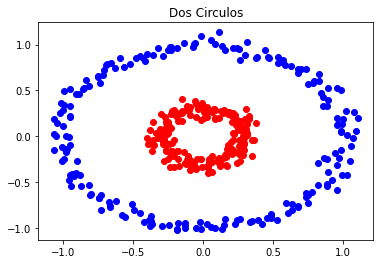

In [18]:
# Datos
X, y=make_circles(n_samples=400, factor=.3, noise=.05)


c_interno=y==1  # etiqueta circulo interno 
c_externo=y==0  # etiqueta circulo externo 


# plot de los circulos
plt.title('Dos Circulos')
plt.plot(X[c_interno, 0], X[c_interno, 1], 'ro')   # 'ro' es mas o menos color rojo y marker 'o'
plt.plot(X[c_externo, 0], X[c_externo, 1], 'bo')
plt.show()

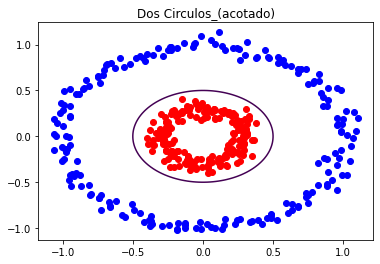

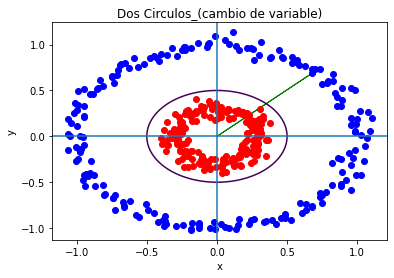

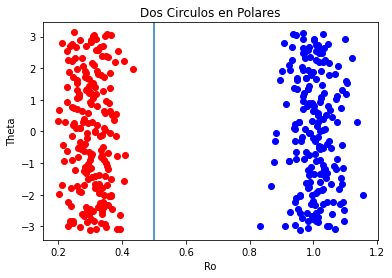

In [19]:
# plot de los circulos con el umbral 

plt.title('Dos Circulos_(acotado)')
plt.plot(X[c_interno, 0], X[c_interno, 1], 'ro')   
plt.plot(X[c_externo, 0], X[c_externo, 1], 'bo')
x=np.linspace(-1.0, 1.0, 100)  # para circunferencia umbral
y=np.linspace(-1.0, 1.0, 100)
z, t=np.meshgrid(x,y)
F=(z)**2+(t)**2-0.25
plt.contour(z,t,F,[0])
plt.show();


# Para polares
plt.title('Dos Circulos_(cambio de variable)')
plt.plot(X[c_interno, 0], X[c_interno, 1], 'ro')   
plt.plot(X[c_externo, 0], X[c_externo, 1], 'bo')
plt.axvline(x=0.0)  # sistema coordenadas
plt.axhline(y=0.0)
plt.arrow(0,0,0.72,0.73, color='g')  # vector
plt.contour(z,t,F,[0])    # circunferencia r=0.5
plt.xlabel('x')
plt.ylabel('y')

# En polares
X, y=make_circles(n_samples=400, factor=.3, noise=.05)


def polar_carte(ro, theta):  # definicion coordenadas polares, convierte polares en cartesianas
    x=ro*np.cos(theta)
    y=ro*np.sin(theta)
    return(x, y)

def carte_polar(x, y):       # convierte cartesianas en polares
    ro=np.sqrt(x**2+y**2)
    theta=np.arctan2(y, x)
    return(ro, theta)


# plot en polares
c_interno=y==1  # etiqueta circulo interno 
c_externo=y==0  # etiqueta circulo externo 
plt.figure(5)
plt.title('Dos Circulos en Polares')
plt.plot(carte_polar(X[c_interno, 0], X[c_interno, 1])[0],carte_polar(X[c_interno, 0], X[c_interno, 1])[1], 'ro')    # circulo interno
plt.plot(carte_polar(X[c_externo, 0], X[c_externo, 1])[0], carte_polar(X[c_externo, 0], X[c_externo, 1])[1], 'bo')   # circulo externo
plt.axvline(x=0.5)          # umbral, recta vertical en x=0.5
plt.xlabel('Ro')
plt.ylabel('Theta')
plt.show();

**Kernel Trick**

<ipython-input-20-7565bb2ab823>:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


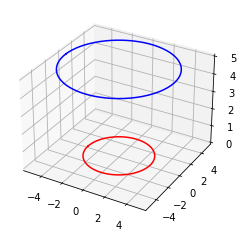

In [20]:
ang=np.linspace(-np.pi, np.pi, 200)


x=3*np.cos(ang)
y=3*np.sin(ang)
z=0  # en realidad, la coordenada z=x^2+y^2


x_1=5*np.cos(ang)
y_1=5*np.sin(ang)
z_1=5


fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot(x, y, z, color='r')
ax.plot(x_1, y_1, z_1, color='b')
plt.show();

###### SVM

![svm](images/svm.png)

Genera un hiperplano (n-1)dimensional para separar los datos. Este primer plano es el llamado clasificador lineal (maximizando la distancia a los puntos).

$$\vec{\omega}\vec{x}-b=0$$

donde :

$\omega$ es el vector normal al plano
$x$ son los datos
$b$ es el sesgo

**Función a minimizar**

$$[\frac{1}{n}\sum_{i=1}^{n}max(0, 1-y_i(\vec{\omega}\vec{x}-b))] + \lambda \|\vec{\omega}\|$$

In [21]:
import warnings
warnings.simplefilter('ignore')

In [22]:
from sklearn.svm import SVR # Support Vector Regressor

In [23]:
svr=SVR(kernel='poly')
svr.fit(X_train, y_train)

train_score=svr.score(X_train, y_train)  # R2 score
test_score=svr.score(X_test, y_test)


train_score, test_score  

(0.18813460970397022, 0.2705978929006456)

In [24]:
#help(svr)

In [25]:
y_pred=svr.predict(X_test)

y_pred[:10]

array([22.04767801, 23.82956054, 14.25698556, 23.76741121, 15.97588188,
       21.2746663 , 21.79420457, 20.02454961, 16.42216985, 21.39141313])

In [26]:
X, y=make_circles(n_samples=400, factor=.3, noise=.05)

X_train_c, X_test_c, y_train_c, y_test_c = tts(X, y, test_size=.2, random_state=42)

In [27]:
from sklearn.svm import SVC # Clasificador 

In [29]:
svc=SVC()
svc.fit(X_train_c, y_train_c)

train_score=svc.score(X_train_c, y_train_c)  # accuracy
test_score=svc.score(X_test_c, y_test_c)


train_score, test_score

(1.0, 1.0)

### Random Forest

https://towardsdatascience.com/decision-tree-algorithm-in-python-from-scratch-8c43f0e40173

![RF](images/RF.jpg)

Arboles de decisión.

+ Pros:

Modelos sencillos, se pueden visualizar. No necesitan preprocesar mucho los datos. Computacionalmente eficientes.

+ Contras:

Muy sensibles a pequeñas variaciones de los datos de entrada. Muy sensible a datos no balanceados. Muy dado al overfitting (poco sesgo, mucha varianza), más cuanto más profundo sea.

**Entropía de información**

$$H(x) = -\sum_i p_ilog(p_i)$$

$$H(x) = -\sum_i p_ilog(p_i) + (1-p_i)log(1-p_i)$$

**Bagging**

Bootstrap aggregating.

Muestreo aleatorio con reemplazamiento y de manera uniforme. Después se hace la media. Además RF coge para cada árbol un subconjunto de características de manera aleatoria (feature bagging), esto se hace para evitar la correlación entre árboles dentro del bosque.

**Extratrees**

Extremely randomized trees.

Tiene básicamente 2 diferencias:
+ Cada árbol usa todo el train (no bootstrap)
+ El spliteo hacia abajo es random (no minimizando entropia)

In [30]:
# RF

from sklearn.ensemble import RandomForestRegressor as RFR

In [41]:
rfr=RFR()
rfr.fit(X_train, y_train)

train_score=rfr.score(X_train, y_train)  # R2 score
test_score=rfr.score(X_test, y_test)


train_score, test_score 

(0.9736044281722717, 0.8747565262654098)

In [33]:
#help(RFR)

In [43]:
rfr=RFR(n_estimators=90, max_depth=3)
rfr.fit(X_train, y_train)

train_score=rfr.score(X_train, y_train)  # R2 score
test_score=rfr.score(X_test, y_test)


train_score, test_score 

(0.8662260503001662, 0.8275318902198574)

In [38]:
y_pred=rfr.predict(X_test)

y_pred[:10]

array([22.95786667, 30.85953333, 16.95753333, 23.39013333, 16.66013333,
       21.2958    , 19.25256667, 15.6595    , 21.23573333, 20.98933333])

In [44]:
# Extra trees

from sklearn.tree import ExtraTreeRegressor as ETR

In [48]:
etr=ETR(criterion='friedman_mse')
etr.fit(X_train, y_train)

train_score=etr.score(X_train, y_train)    # R2
test_score=etr.score(X_test, y_test)

train_score, test_score 

(1.0, 0.7072411005972125)

In [49]:
#help(etr)